In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [10]:
def generateData(numberOfClassEl, numberOfClasses): 
    radius = 50 
    data_x = [] 
    data_y = []
    for classNum in range(numberOfClasses): 
        centerX, centerY = random.randint(radius, 600 - radius), random.randint(radius, 400 - radius) 
        for rowNum in range(numberOfClassEl): 
            data_x.append([random.gauss(centerX, radius/2), random.gauss(centerY, radius/2)]) 
            data_y.append(classNum)
    return np.array(data_x), np.array(data_y)

In [11]:
X, Y = generateData(50, 2)

[]

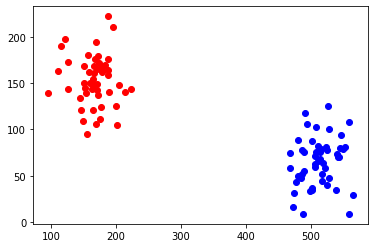

In [12]:
for i in range(len(X)):
    if Y[i] == 0:
        plt.scatter(X[i][0], X[i][1], c='r')
    else:
        plt.scatter(X[i][0], X[i][1], c='b')

plt.plot()

In [13]:
class SVM:

  def __init__(self, C=10000.0, max_iter=10000, degree=3, gamma=1):
    self.kernel = lambda x,y: np.dot(x, y.T)
    self.C = C
    self.max_iter = max_iter

  def restrict_to_square(self, t, v0, u): 
    t = (np.clip(v0 + t*u, 0, self.C) - v0)[1]/u[1]
    return (np.clip(v0 + t*u, 0, self.C) - v0)[0]/u[0]

  def fit(self, X, y):
    self.X = X.copy()
    self.y = y * 2 - 1 
    self.w = np.zeros_like(self.y, dtype=float)
    self.K =  np.dot(self.X, self.X.T) * self.y[:,np.newaxis] * self.y

    for _ in range(self.max_iter):
      for i in range(len(self.w)):                                    
        j = np.random.randint(0, len(self.w))                         
        Q = self.K[[[i, i], [j, j]], [[i, j], [i, j]]] 
        v0 = self.w[[i, j]]                                        
        k0 = 1 - np.sum(self.w * self.K[[i, j]], axis=1)           
        u = np.array([-self.y[j], self.y[i]])                            
        t_max = np.dot(k0, u) / (np.dot(np.dot(Q, u), u) + 1E-15) 
        self.w[[i, j]] = v0 + u * self.restrict_to_square(t_max, v0, u)

    idx, = np.nonzero(self.w > 1E-15) 
    self.b = np.mean((1.0-np.sum(self.K[idx]*self.w, axis=1))*self.y[idx]) 
  
  def decision_function(self, X):
    return np.sum(np.dot(X, self.X.T) * self.y * self.w, axis=1) + self.b

  def predict(self, X): 
    return (np.sign(self.decision_function(X)) + 1) // 2

In [14]:
svm = SVM(C=10, max_iter=1000)
svm.fit(X, Y)

In [15]:
xmin = [np.min(X[:, 0]), np.max(X[:, 0])]
ymin = [np.min(X[:, 1]), np.max(X[:, 1])]
xx, yy = np.meshgrid(np.linspace(*xmin), np.linspace(*ymin))
z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

[]

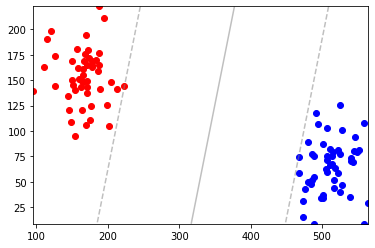

In [16]:
for i in range(len(X)):
    if Y[i] == 0:
        plt.scatter(X[i][0], X[i][1], c='r')
    else:
        plt.scatter(X[i][0], X[i][1], c='b')

plt.contour(xx, yy, z, colors='grey', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.plot()